<a href="https://colab.research.google.com/github/FernandoLuiz-web/Product-F-ller/blob/main/product_fuller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, Math, Markdown
"""Fórmula de Füller para passantes"""
explicacao = "A fórmula de Füller é usada para calcular o percentual passante de partículas, considerando o diâmetro das partículas e o diâmetro máximo admissível."
formula_fuller = r"P = 100 \cdot \left( \frac{d}{D} \right)^n"
display(Markdown(explicacao))
display(Math(formula_fuller))

A fórmula de Füller é usada para calcular o percentual passante de partículas, considerando o diâmetro das partículas e o diâmetro máximo admissível.

<IPython.core.display.Math object>

In [60]:
from typing import List

class ProductFullerProps:
    def __init__(self, particle_diameters: List[float]) -> None:
        """
        Args:
            particle_diameters (List[float]): Lista de diâmetros das partículas.
        """
        if not particle_diameters:
            raise ValueError("A lista de diâmetros de partículas não pode estar vazia.")
        self._particle_diameters = particle_diameters
        self._maximum_particle_diameter = max(particle_diameters)

    @property
    def particle_diameters(self) -> List[float]:
        return self._particle_diameters

    @property
    def maximum_particle_diameter(self) -> float:
        return self._maximum_particle_diameter

    def fuller_calc(self) -> List[float]:
        return [
            round((p_real / self.maximum_particle_diameter) ** 0.5 * 100, 1)
            for p_real in self.particle_diameters
        ]


Dropdown(description='Escolha:', index=1, options=(('Escolha um tipo de produto', <Products.DEFAULT: 'Escolha …

IntText(value=0, description='Número de peneiras:', style=DescriptionStyle(description_width='initial'))

HBox()

Button(button_style='success', description='Calcular', style=ButtonStyle())

<Figure size 640x480 with 0 Axes>

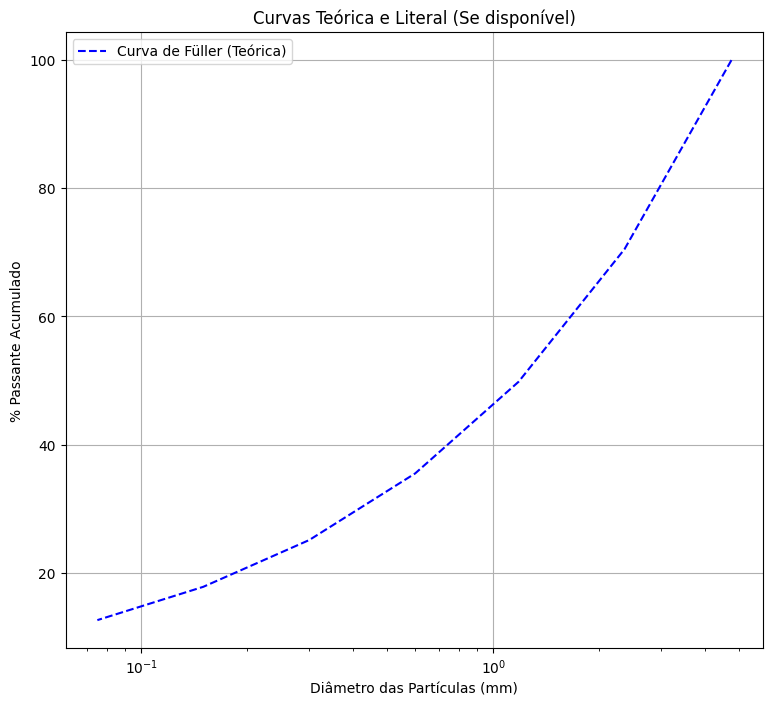

<Figure size 640x480 with 0 Axes>

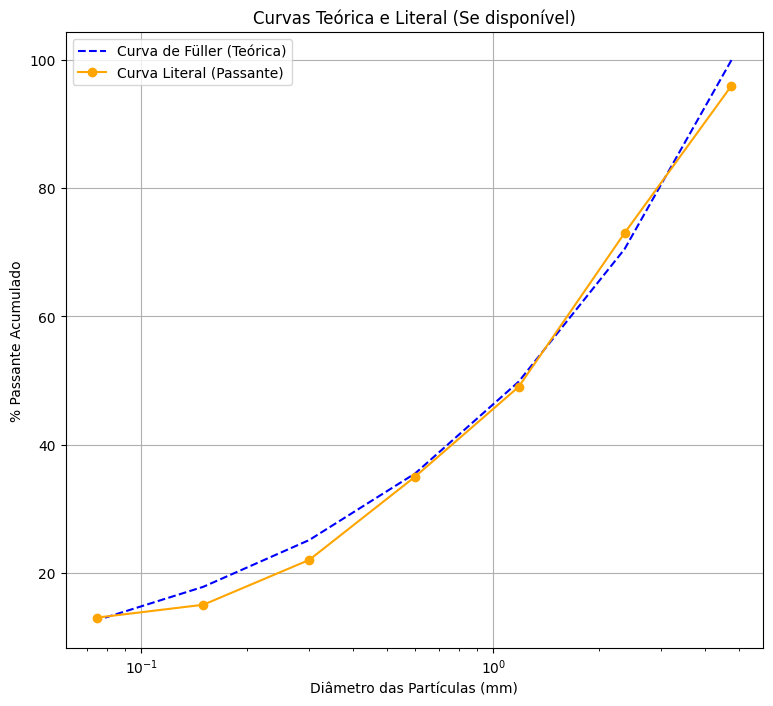

In [70]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from enum import Enum
from IPython.display import display, clear_output

class Products(Enum):
    DEFAULT = "Escolha um tipo de produto"
    ARGAMASSAS = "ARGAMASSAS"
    REJUNTES = "REJUNTES"
    IMPERMEABILIZANTES = "IMPERMEABILIZANTES"

options = [(product.value, product) for product in Products]

dropdown = widgets.Dropdown(
    options=options,
    description="Escolha:",
    value=Products.DEFAULT,
    style={"description_width": "initial"}
)

peneiras_input = widgets.IntText(
    description="Número de peneiras:",
    style={"description_width": "initial"},
    value=0,
)

particle_inputs = widgets.HBox()

calculate_button = widgets.Button(
    description="Calcular",
    button_style="success",
)


def update_particle_inputs(change):
    n_peneiras = peneiras_input.value
    particle_widgets = [
        widgets.FloatText(
            description=f"Valor(mm) da Malha {i + 1} :", style={"description_width": "initial"}
        )
        for i in range(n_peneiras)
    ]

    passante_widgets = [
        widgets.FloatText(
            description=f"Valor % obtido em passante {i + 1}:", style={"description_width": "initial"}
        )
        for i in range(n_peneiras)
    ]

    particle_vbox = widgets.VBox(particle_widgets)
    passante_vbox = widgets.VBox(passante_widgets)

    particle_inputs.children = [particle_vbox, passante_vbox]

def on_dropdown_change(change):
    clear_output(wait=True)
    display(dropdown)
    if change["new"] == Products.DEFAULT:
        print("Escolha um tipo de produto.")
    else:
        display(peneiras_input, particle_inputs, calculate_button)

import matplotlib.pyplot as plt

def calculate_curve(_):
    try:
        diameters = [child.value for child in particle_inputs.children[0].children]
        passantes = [child.value for child in particle_inputs.children[1].children]

        if len(diameters) == 0:
            print("Adicione os diâmetros das partículas.")
            return

        products = ProductFullerProps(diameters)

        plt.figure(figsize=(9, 8))

        plt.plot(
            products.particle_diameters,
            products.fuller_calc(),
            linestyle="--",
            color="blue",
            label="Curva de Füller (Teórica)",
        )
        if all(passante > 0 for passante in passantes):
            plt.plot(
                diameters,
                passantes,
                marker="o",
                color="orange",
                label="Curva Literal (Passante)",
            )
        plt.title("Curvas Teórica e Literal (Se disponível)")
        plt.xlabel("Diâmetro das Partículas (mm)")
        plt.ylabel("% Passante Acumulado")
        plt.xscale("log")
        plt.yscale("linear")
        plt.grid(True)
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Erro: {e}")


dropdown.observe(on_dropdown_change, names="value")
peneiras_input.observe(update_particle_inputs, names="value")
calculate_button.on_click(calculate_curve)

display(dropdown)